In [ ]:
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
import cv2

In [ ]:
sample_image = cv2.imread("BookDataBase/IMG_20230105_134123.jpg")
rgb = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [ ]:
booktracker = load_model('booktracker.h5')

1/1 [==============================] - 0s 13ms/step
[(2091, 3385), (482, 1403)]
482


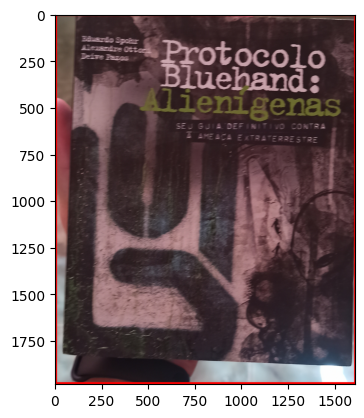

In [16]:
base_img = cv2.imread("BookDataBase/IMG_20230105_134144.jpg")
sample_image = cv2.cvtColor(base_img, cv2.COLOR_BGR2RGB)
resized = tf.image.resize(sample_image, (120,120))
yhat = booktracker.predict(np.expand_dims(resized/255,0))
sample_coords = yhat[1][0]



if yhat[0] > 0.8: 
    
    auxCoord  = [tuple(np.multiply(sample_coords[2:], [sample_image.shape[1],sample_image.shape[0]]).astype(int)), tuple(np.multiply(sample_coords[:2], [sample_image.shape[1],sample_image.shape[0]]).astype(int))]
    print (auxCoord)
    print (auxCoord[1][0])
    roi = sample_image[auxCoord[1][1]:auxCoord[0][1], auxCoord[1][0]: auxCoord[0][0]]
    cv2.imwrite("book.jpg", cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    
    cv2.rectangle(sample_image, 
              tuple(np.multiply(sample_coords[:2], [sample_image.shape[1],sample_image.shape[0]]).astype(int)),
              tuple(np.multiply(sample_coords[2:], [sample_image.shape[1],sample_image.shape[0]]).astype(int)), 
                    (255,0,0), 20)

plt.imshow(roi)

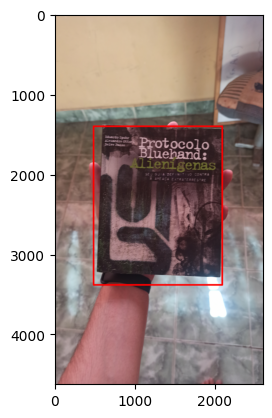

In [12]:
plt.imshow(sample_image)

In [ ]:
sample_image.shape

In [ ]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = booktracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.6: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (220,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (220,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'Livro', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 1, cv2.LINE_AA)
    
    cv2.imshow('MauMauTracker', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()